<a href="https://colab.research.google.com/github/Nimira43/Neural-Networks-with-Keras/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Deep Neural Networks with Keras

###Import Libraries



1.   MNIST dataset used
2.   Develop a fully connect Neural Network / Artificial Neural Network / Multi-layer Perceptron
3.   Train and evaluate



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###Importing Dataset

In [14]:
from keras.datasets import mnist

#load dataseet
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#count number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print('Train label: ', dict(zip(unique, counts)))

#count number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print('Train label: ', dict(zip(unique, counts)))

Train label:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Train label:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


###Data visualisation

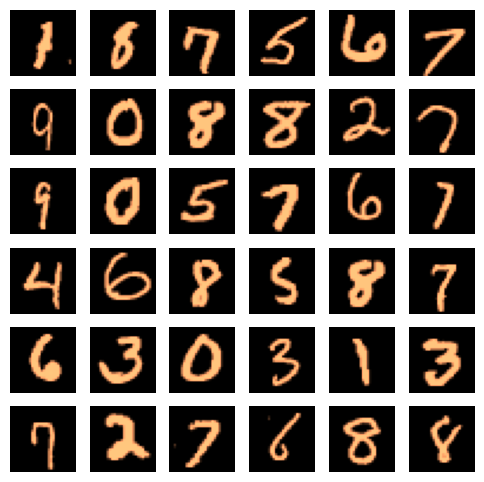

In [15]:
indice = np.random.randint(0, x_train.shape[0], size=36)
imgs = x_train[indice]
labels  = y_train[indice]

plt.figure(figsize=(6, 6))
for i in range(len(indice)):
    plt.subplot(6, 6, i + 1)
    img = imgs[i]
    plt.imshow(img, cmap='copper')
    plt.axis('off')
plt.show()
plt.savefig('mnist_image.png')
plt.close('all')

###Model Designing

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


In [17]:
num_labels = len(np.unique(y_train))

In [21]:
!pip install np.utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np.utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=f94efbb9e74050a6dc62c05cf37238935e95c966b4f1b28193070c99228243ed
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np.utils


In [24]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=c22d04f5de5f3c789b50887876861d5811689c98d7b5b0dee2022b9ee7112e84
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [29]:
from tensorflow.keras.utils import to_categorical

# convert to one hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [32]:
# Image dimensions
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [33]:
# Resize and normalise
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_train = np.reshape(x_test, [-1, input_size])
x_train = x_test.astype('float32') / 255

In [34]:
batch_size = 128
hidden_units = 256


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation

A three-layer MLP (Multi-Layer Perceptron) with ReLU (Rectified Linear Unit) activations and dropout is a classic setup for building a robust neural network model. Here's a breakdown:

MLP (Multi-Layer Perceptron): This is a type of feedforward artificial neural network consisting of multiple layers of nodes. Each node in one layer connects to every node in the next layer.

Three Layers: The model has three hidden layers. Each layer processes the input from the previous layer and passes its output to the next layer. The exact number of neurons in each layer can vary depending on the task.

ReLU Activation: ReLU stands for Rectified Linear Unit. It’s an activation function used in neural networks that outputs the input directly if it is positive, otherwise, it outputs zero. This helps in introducing non-linearity into the model, allowing it to learn more complex patterns.

Dropout: This is a regularization technique used to prevent overfitting in neural networks. By randomly dropping units (along with their connections) during the training process, dropout forces the network to learn more robust features.

In [39]:


model = Sequential()
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

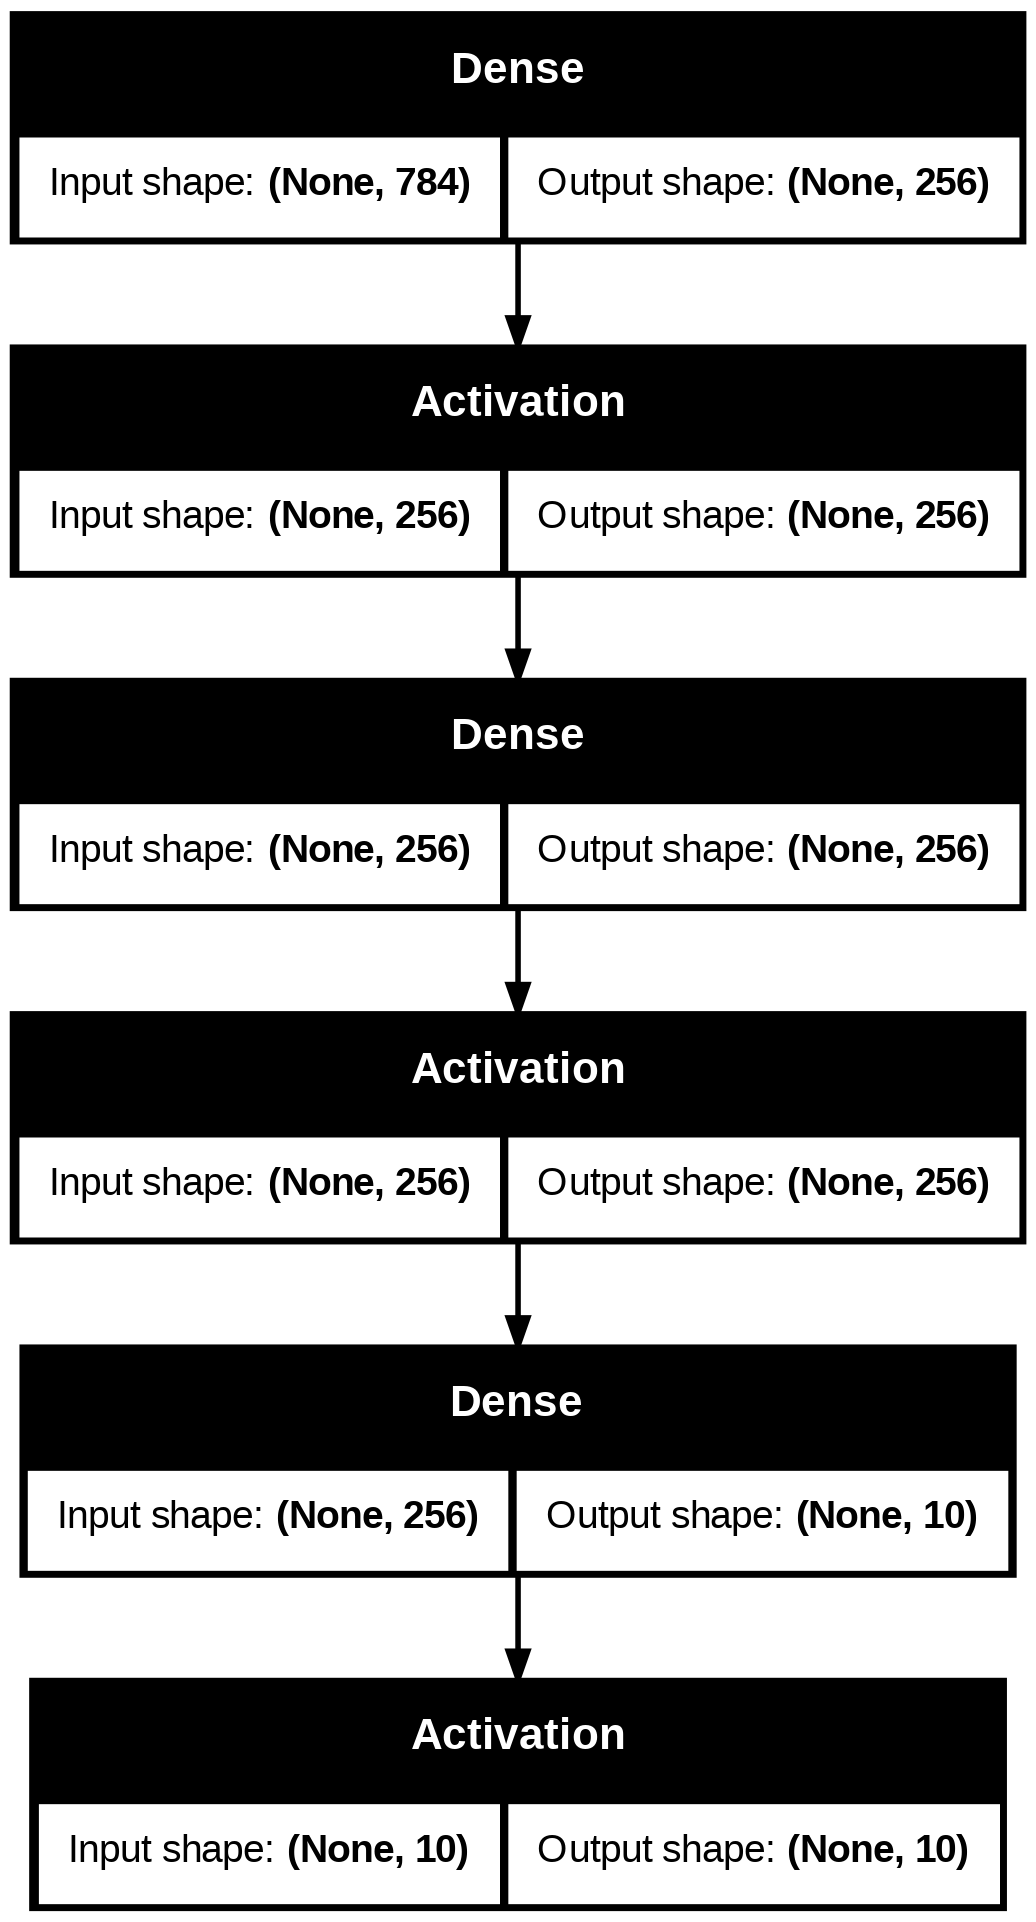

In [42]:
from keras.utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)